<a href="https://colab.research.google.com/github/JAMILA09ALI/Machine-Vision-Quizzes/blob/main/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Assignment1_MV/"

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# kernel1 = np.ones((1,1),np.uint8)
# kernel3 = np.ones((4,4),np.uint8)
# kernel6 = np.ones((1,1),np.uint8)

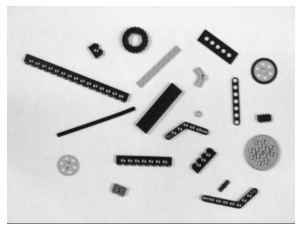

In [ ]:
image = cv2.imread(path +'lego1.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray =  cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
_, thresh = cv2.threshold(img, 255, 255, cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(gray, cmap='gray')

(-0.5, 700.5, 529.5, -0.5)

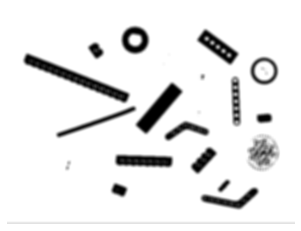

In [ ]:
blur = cv2.GaussianBlur(thresh, (11, 11), cv2.BORDER_DEFAULT)
plt.imshow(blur, cmap='gray')
plt.axis('off')

(-0.5, 700.5, 529.5, -0.5)

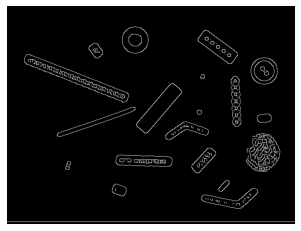

In [ ]:
canny = cv2.Canny(blur, 50, 20, 3 )
plt.imshow(canny, cmap='gray')
plt.axis('off')

(<matplotlib.image.AxesImage at 0x7fb62aaa2be0>,
 Text(0.5, 1.0, 'erosion Image'))

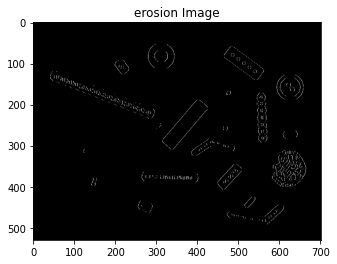

In [ ]:
erosion = cv2.erode(canny,(3,3),iterations = 1)

plt.imshow(erosion, cmap='gray'),plt.title('erosion Image')

(<matplotlib.image.AxesImage at 0x7fb62a9fec10>,
 Text(0.5, 1.0, 'dilation Image'))

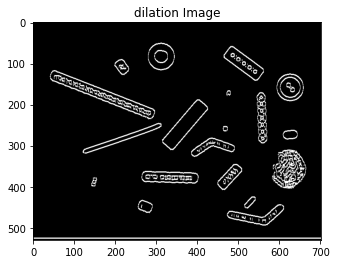

In [ ]:
kernal = np.ones((2, 2), np.uint8)
dilation = cv2.dilate(canny, (2,2), iterations=2)
plt.imshow(dilation, cmap='gray'),plt.title('dilation Image')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb62b90d880>,
 Text(0.5, 1.0, 'closing Image'))

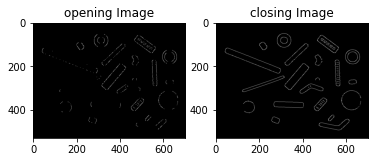

In [ ]:
opening = cv2.morphologyEx(canny, cv2.MORPH_OPEN,(4,4))
closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4))


plt.subplot(121),plt.imshow(opening, cmap='gray'),plt.title('opening Image')
plt.subplot(122),plt.imshow(closing, cmap='gray'),plt.title('closing Image')

(<matplotlib.image.AxesImage at 0x7fb62b5eeb50>,
 Text(0.5, 1.0, 'gradient Image'))

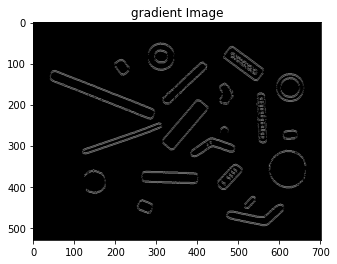

In [ ]:
gradient = cv2.morphologyEx(dilation, cv2.MORPH_GRADIENT, (1,1))
plt.imshow(gradient, cmap='gray'),plt.title('gradient Image')

(<matplotlib.image.AxesImage at 0x7fb62b5cd520>,
 Text(0.5, 1.0, 'tophat Image'))

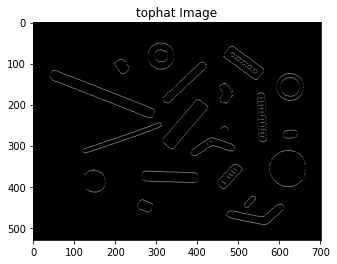

In [ ]:
tophat = cv2.morphologyEx(canny, cv2.MORPH_TOPHAT, (5,5))
plt.imshow(tophat, cmap='gray'),plt.title('tophat Image')

(<matplotlib.image.AxesImage at 0x7fb62b51eee0>,
 Text(0.5, 1.0, 'blackhat Image'))

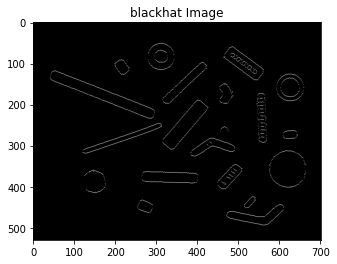

In [ ]:
blackhat = cv2.morphologyEx(canny, cv2.MORPH_BLACKHAT, (1,1))
plt.imshow(blackhat, cmap='gray'),plt.title('blackhat Image')

objects in the image =  609


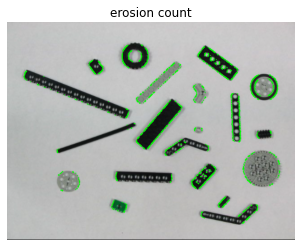

In [ ]:
(cnt1, hierarchy) = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt1, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('erosion count')
plt.axis('off')
print("objects in the image = ", len(cnt1))

objects in the image =  86


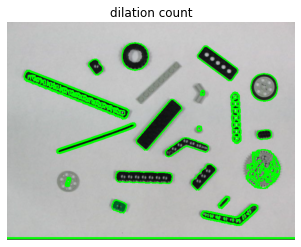

In [ ]:
(cnt2, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt2, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('dilation count')
plt.axis('off')
print("objects in the image = ", len(cnt2))

objects in the image =  660


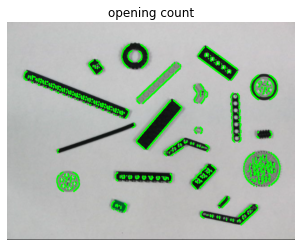

In [ ]:
(cnt3, hierarchy) = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt3, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('opening count')
plt.axis('off')
print("objects in the image = ", len(cnt3))

objects in the image =  145


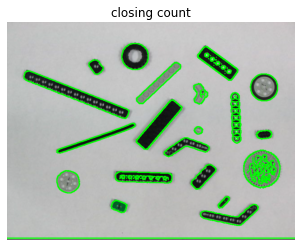

In [ ]:
(cnt4, hierarchy) = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt4, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('closing count')
plt.axis('off')
print("objects in the image = ", len(cnt4))

objects in the image =  1622


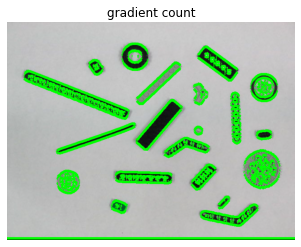

In [ ]:
(cnt5, hierarchy) = cv2.findContours(gradient.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt5, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('gradient count')
plt.axis('off')
print("objects in the image = ", len(cnt5))

objects in the image =  493


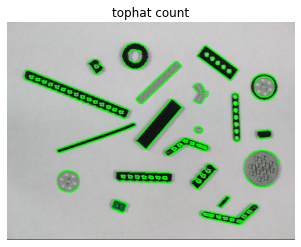

In [ ]:
(cnt6, hierarchy) = cv2.findContours(tophat.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt6, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('tophat count')
plt.axis('off')
print("objects in the image = ", len(cnt6))

objects in the image =  481


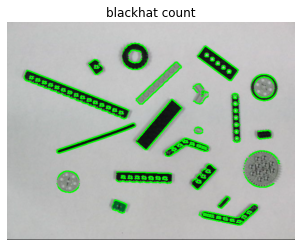

In [ ]:
(cnt7, hierarchy) = cv2.findContours(blackhat.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt7, -1, (0, 255, 0), 2)
 
plt.imshow(rgb),plt.title('blackhat count')
plt.axis('off')
print("objects in the image = ", len(cnt7))